## Notebook for the Kong 2023 QC 
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 4th April 2023

#### Load required packages

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Setup Cells

In [ ]:
%matplotlib inline

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


#### Upload Data

In [ ]:
#Loading again to further processing
input_Normal_file = '/Users/anna.maguza/Desktop/Data/Gut_project/Healthy_gut_data/Kong_2023/Raw_anndata/Kong_2023_raw_anndata.h5ad'  # the file that will store the analysis results
output_Normal_file = '/Users/anna.maguza/Desktop/Data/Gut_project/Healthy_gut_data/Kong_2023/Raw_anndata/Kong_2023_raw_anndata_output.h5ad'  # the file that will store the analysis results

In [ ]:
#Anndata upload
adata = sc.read_h5ad(input_Normal_file)
adata.X

<720633x27830 sparse matrix of type '<class 'numpy.float32'>'
	with 729422510 stored elements in Compressed Sparse Row format>

In [ ]:
# Filter out only healthy samples
adata = adata[adata.obs['disease__ontology_label'] == 'normal']

In [ ]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, inplace=True)


/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [ ]:
# Make gene_id as a first column in adata.var
adata.var.insert(0, 'gene_id', adata.var.index)

#### Calculate cell cycle scores

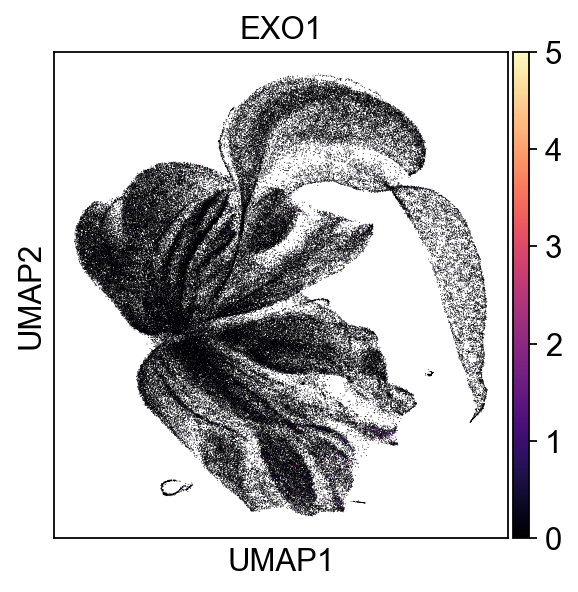

In [ ]:
sc.pl.umap(adata, color_map = "magma", color=['EXO1'])

In [ ]:
!if [ ! -f /Users/anna.maguza/Desktop/GCA_social_network/cell_cycle_genes.txt ]; then curl -o /Users/anna.maguza/Desktop/GCA_social_network/cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [ ]:
cell_cycle_genes = [x.strip() for x in open('/Users/anna.maguza/Desktop/GCA_social_network/cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [ ]:
# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [ ]:
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

94


In [ ]:
#Create basic anndata for score calculation
adata_log = an.AnnData(X = adata.X,  var = adata.var, obs = adata.obs)

In [ ]:
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['PARK7', 'PLA2G2A', 'C1QA', 'C1QB', 'ID3', 'RPL11', 'SH3BGRL3', 'CD52', 'GUCA2B', 'GUCA2A', 'YBX1', 'PRDX1', 'UQCRH', 'JUN', 'REG4', 'S100A10', 'S100A6', 'RPS27', 'HAX1', 'RGS5', 'RGS2', 'PIGR', 'RPS27A', 'ACTG2', 'REG1B', 'REG1A', 'REG3A', 'TMSB10', 'GNLY', 'FABP1', 'DUSP2', 'CXCR4', 'GCG', 'ATP5G3', 'SLC40A1', 'CCL20', 'PTMA', 'RPL32', 'RPL15', 'RPL14', 'TKT', 'MTRNR2L12', 'RPL24', 'SERP1', 'APOD', 'RPL9', 'IGFBP7', 'IGJ', 'IL8', 'CXCL10', 'RPL34', 'RPS3A', 'MRPL36', 'GZMA', 'COX7C', 'SKP1', 'CXCL14', 'MZB1', 'CD74', 'RPS14', 'LARP1', 'FABP6', 'NUDCD2', 'DUSP1', 'ZNF165', 'MRPS18B', 'HLA-B', 'AIF1', 'CLIC1', 'HSPA1A', 'RNF5', 'HLA-DRA', 'HLA-DRB5', 'HLA-DRB1', 'HLA-DPA1', 'HLA-DPB1', 'RPS18', 'IL17A', 'EEF1A1', 'SNX3', 'RWDD1', 'CTGF', 'ACTB', 'AGR2', 'CYCS', 'HNRNPA2B1', 'HSPB1', 'NAPEPLD', 'SLC26A3', 'ATP6V1F', 'ZC3HC1', 'TMSB4X', 'SAT1', 'TIMP1', 'SSR4', 'R

In [ ]:
sc.pp.log1p(adata_log)

In [ ]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    513 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    514 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)


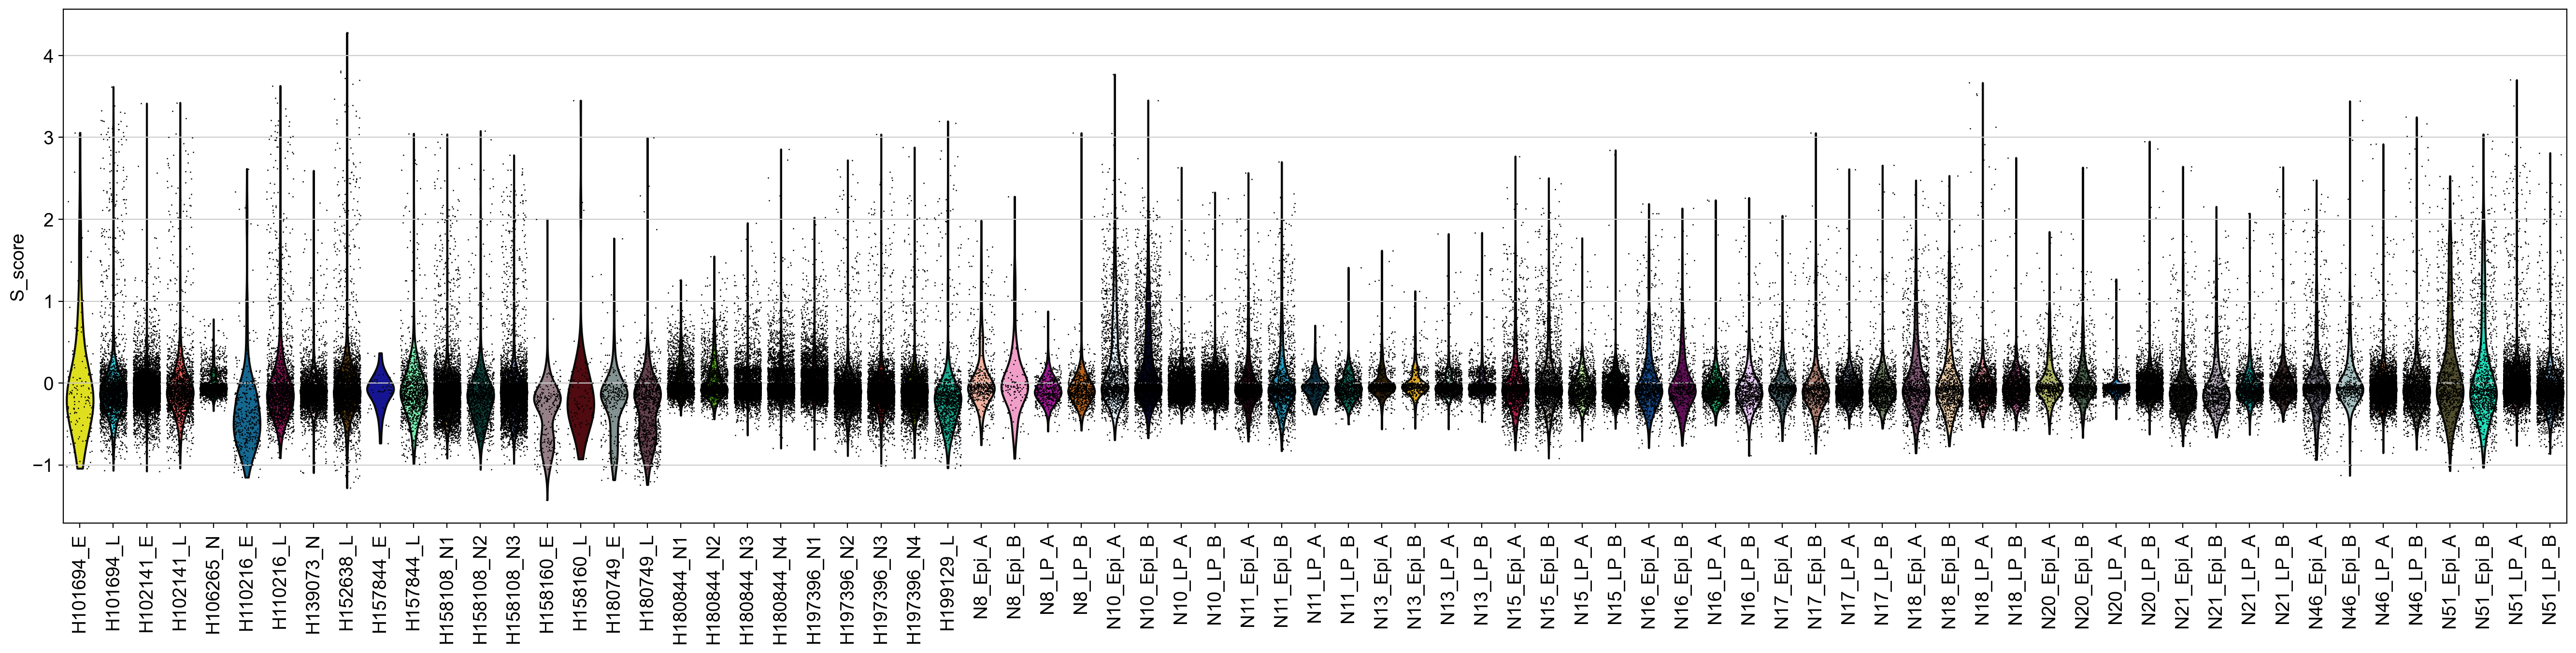

In [ ]:
%matplotlib inline
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(adata_log, ['S_score'],
             jitter = 0.4, groupby = "biosample_id", rotation = 90)

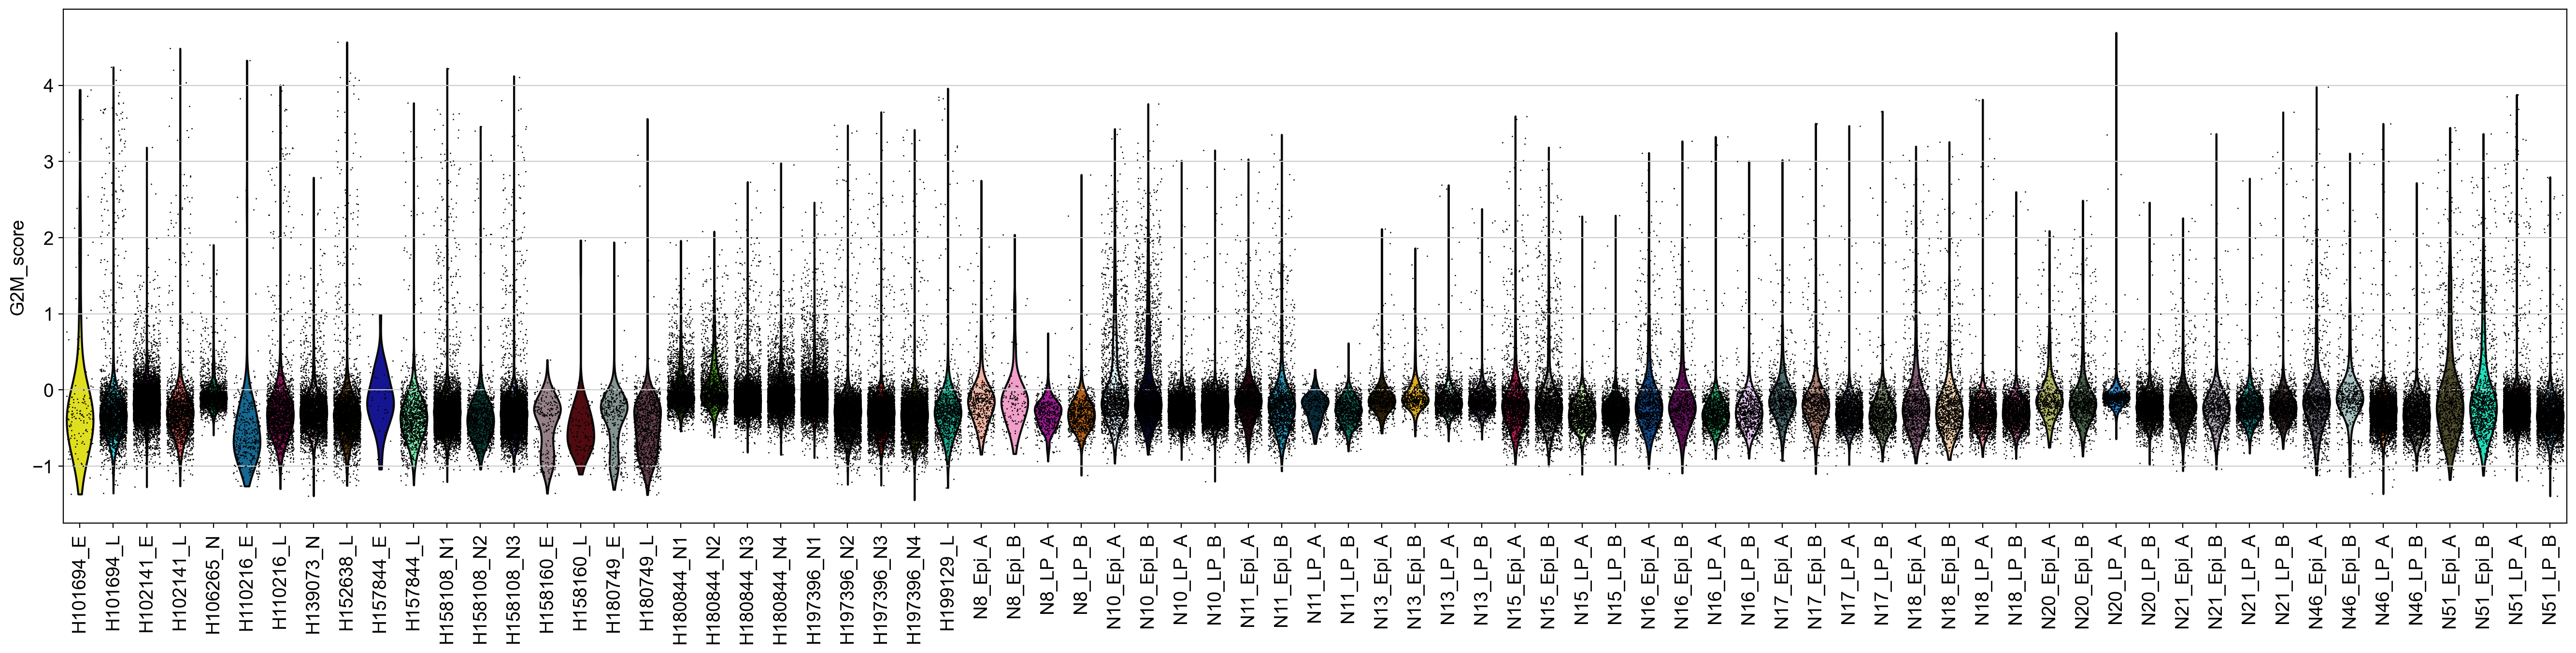

In [ ]:
%matplotlib inline
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(adata_log, ['G2M_score'],
             jitter = 0.4, groupby = "biosample_id", rotation = 90)

In [ ]:
adata.obs['S_score'] = adata_log.obs['S_score']
adata.obs['G2M_score'] = adata_log.obs['G2M_score']


In [ ]:
adata.var

,gene_id,gene_name,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mito,ribo,highly_variable,highly_variable_rank,means,variances,variances_norm
gene_name,,,,,,,,,,,,,,,
AL627309.1,ENSG00000237683,AL627309.1,371,0.002118,0.002115,99.795936,385.0,5.955837,False,False,False,NaN,0.002118,0.002267,0.877198
AP006222.2,ENSG00000228463,AP006222.2,6831,0.041693,0.040847,96.242698,7580.0,8.933400,False,False,False,NaN,0.041693,0.049954,0.831065
RP4-669L17.10,ENSG00000237094,RP4-669L17.10,179,0.001001,0.001001,99.901543,182.0,5.209486,False,False,False,NaN,0.001001,0.001033,0.883855
RP11-206L10.3,ENSG00000235373,RP11-206L10.3,363,0.002035,0.002033,99.800337,370.0,5.916202,False,False,False,NaN,0.002035,0.002108,0.851228
RP11-206L10.2,ENSG00000228327,RP11-206L10.2,733,0.004153,0.004144,99.596823,755.0,6.628041,False,False,False,NaN,0.004153,0.004389,0.820734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC00676,ENSG00000234854,LINC00676,0,0.000000,0.000000,100.000000,0.0,0.000000,False,False,False,NaN,0.000000,0.000000,0.000000
RP11-739N10.1,ENSG00000264151,RP11-739N10.1,1,0.000006,0.000006,99.999450,1.0,0.693147,False,False,False,NaN,0.000006,0.000006,0.999206
CTB-60B18.18,ENSG00000268287,CTB-60B18.18,0,0.000000,0.000000,100.000000,0.0,0.000000,False,False,False,NaN,0.000000,0.000000,0.000000


In [ ]:
# Save adata
adata.write('/Users/anna.maguza/Desktop/Data/Gut_project/Healthy_gut_data/Kong_2023/Raw_anndata/adata_Kong_2023_healthy_with_QC.h5ad')